In [ ]:
#default_exp validation_visuals

In [ ]:
#export
#dependencies

#nlp packages
import spacy
from spacy.util import minibatch, compounding

#manipulation of tables/arrays
import pandas as pd
import numpy as np
import copy
import json

import difflib
import matplotlib.pyplot as plt
import matplotlib as mpl

#internal imports
from ssda_nlp.collate import *
from ssda_nlp.split_data import *
from ssda_nlp.modeling import *
from ssda_nlp.model_performance_utils import *
from ssda_nlp.xml_parser import *
from ssda_nlp.unstructured2markup import *
from ssda_nlp.utility import *
from ssda_nlp.relationships import *
from ssda_nlp.full_volume import *

In [ ]:
#no_test

COLOR = 'grey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [ ]:
#no_test

def val_vis_bar(validation_list):
    #Set up the figure
    plt.figure(figsize=(15,10))
    colors_array = ['g']*17 + ['r']*8
    
    #Set up the variables
    val1 = validation_list[0]
    objects = val1.keys()
    y_pos = np.arange(len(objects))
    performance = [0]*y_pos
    
    #Gather each validation dictionary from each entry into a summed var
    for i in range(len(validation_list)):
        vals = validation_list[i]

        performance = [sum(x) for x in zip(performance, vals)]

    #Plot the final results
    plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors_array)
    plt.xticks(ticks=y_pos, labels=objects, rotation=75, fontsize=tick_font)
    plt.xlabel('Checks', fontsize=label_font)
    plt.ylabel('Total Number of Validation Flags', fontsize=label_font)
    plt.title('Full Volume Validation Checks', fontsize=title_font)

    plt.show()

In [ ]:
models_list = ["15834", "166470", "239746", "exhaustive_models", "mat_baut_1", "port01", "st_aug_bapt_2"]
#column names: people, places, events, json_path, entities, noCategory, validation_list
column_list = ["people", "places", "events", "json_path", "entities", "noCategory", "validation_list"]
for col in column_list:
    col = [0]*len(models_list)

for idx, modelTemp in enumerate(models_list):
    #"transcriptions\\15834.xml", "models/15834"
    my_trans = "transcriptions\\" + str(modelTemp) + ".xml"
    my_dir = "models/" + str(modelTemp)
    people[idx], places[idx], events[idx], json_path[idx], entities[idx], noCategory[idx], validation_list[idx] = process_volume(my_trans, my_dir)
    print("--------------------------------------")
    val_vis_bar(validation_list[idx])
    

C:\Users\14193\anaconda3\lib\site-packages\spacy\util.py:730: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Loaded model 'models/15834'
Entities extracted.
Entry entities:


,index,entry_no,pred_entity,pred_label,pred_start,pred_end,assigned
0,0,1033-1,Juana,PER,10,15,True
1,1,1033-1,Esc.va,CHAR,17,23,True
2,2,1033-1,Domingo veinte y dos de [roto] y nueve,DATE,24,62,True
3,3,1033-1,Thomas de Orvera,PER,66,82,True
4,4,1033-1,Juana,PER,121,126,True


Entry people:


[{'id': '15834-1033-1-P4',
  'name': 'Juan Joseph de Justis',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': None,
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-1-P3',
    'relationship_type': 'slave'}]},
 {'id': '15834-1033-1-P5',
  'name': 'Joseph Salcedo',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': None,
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-1-P1',
    'relationship_type': 'godchild'}]},
 {'id': '15834-1033-1-P6',
  'name': 'Ana de Santiago',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': None,
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-1-P1',
    'relationship_type': 'godchild'}]},
 {'id': '15834

Entry places:


['Catedral de San Carlos Borromeo']

Entry events:


[{'id': '15834-1033-1-E1',
  'type': 'baptism',
  'principal': '15834-1033-1-P1',
  'date': '????-??-22',
  'location': 'Catedral de San Carlos Borromeo',
  'cleric': '15834-1033-1-P2'}]

Uncategorized characteristics:
Entry entities:


,index,entry_no,pred_entity,pred_label,pred_start,pred_end,assigned
0,0,1033-2,Paula,PER,10,15,True
1,1,1033-2,Esc.a,CHAR,17,22,True
2,2,1033-2,Juebes veinte y tres de feb.o de mil sietec.to...,DATE,23,86,True
3,3,1033-2,Thomas de Orvera,PER,90,106,True
4,4,1033-2,Paula,PER,145,150,True


Entry people:


[{'id': '15834-1033-2-P4',
  'name': 'Juan Joseph',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': 'esc.s',
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-2-P6',
    'relationship_type': 'enslaver'}]},
 {'id': '15834-1033-2-P5',
  'name': 'Maria Josepha',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': 'esc.s',
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-2-P6',
    'relationship_type': 'enslaver'}]},
 {'id': '15834-1033-2-P6',
  'name': 'Capitan D. Luis Hurtado de Mendoza',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': None,
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-2-P5',
    'relationship_type': 'slave'},
  

Entry places:


['Catedral de San Carlos Borromeo']

Entry events:


[{'id': '15834-1033-2-E1',
  'type': 'baptism',
  'principal': '15834-1033-2-P1',
  'date': '1719-02-23',
  'location': 'Catedral de San Carlos Borromeo',
  'cleric': '15834-1033-2-P2'}]

Uncategorized characteristics:
Entry entities:


,index,entry_no,pred_entity,pred_label,pred_start,pred_end,assigned
0,0,1033-3,Maria,PER,10,15,True
1,1,1033-3,Esc.a,CHAR,16,21,True
2,2,1033-3,Miercoles prim.o de feb.o de mil siete.tos y d...,DATE,22,79,True
3,3,1033-3,Thomas de Orvera,PER,83,99,True
4,4,1033-3,Maria,PER,136,141,True


Entry people:


[{'id': '15834-1033-3-P4',
  'name': 'Juan',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': 'esc.s',
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-3-P6',
    'relationship_type': 'enslaver'}]},
 {'id': '15834-1033-3-P5',
  'name': 'Josepha',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': 'esc.s',
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-3-P6',
    'relationship_type': 'enslaver'}]},
 {'id': '15834-1033-3-P6',
  'name': 'Capitan Antonio Benites',
  'origin': None,
  'ethnicities': None,
  'age': None,
  'legitimacy': None,
  'occupation': None,
  'phenotype': None,
  'status': None,
  'titles': None,
  'ranks': None,
  'relationships': [{'related_person': '15834-1033-3-P5',
    'relationship_type': 'slave'},
   {'related_person': '158

Entry places:


['Catedral de San Carlos Borromeo']

Entry events:


[{'id': '15834-1033-3-E1',
  'type': 'baptism',
  'principal': '15834-1033-3-P1',
  'date': '1719-02-01',
  'location': 'Catedral de San Carlos Borromeo',
  'cleric': '15834-1033-3-P2'}]

Uncategorized characteristics:


KeyboardInterrupt: 

## Bar Graph of All Validation Checks

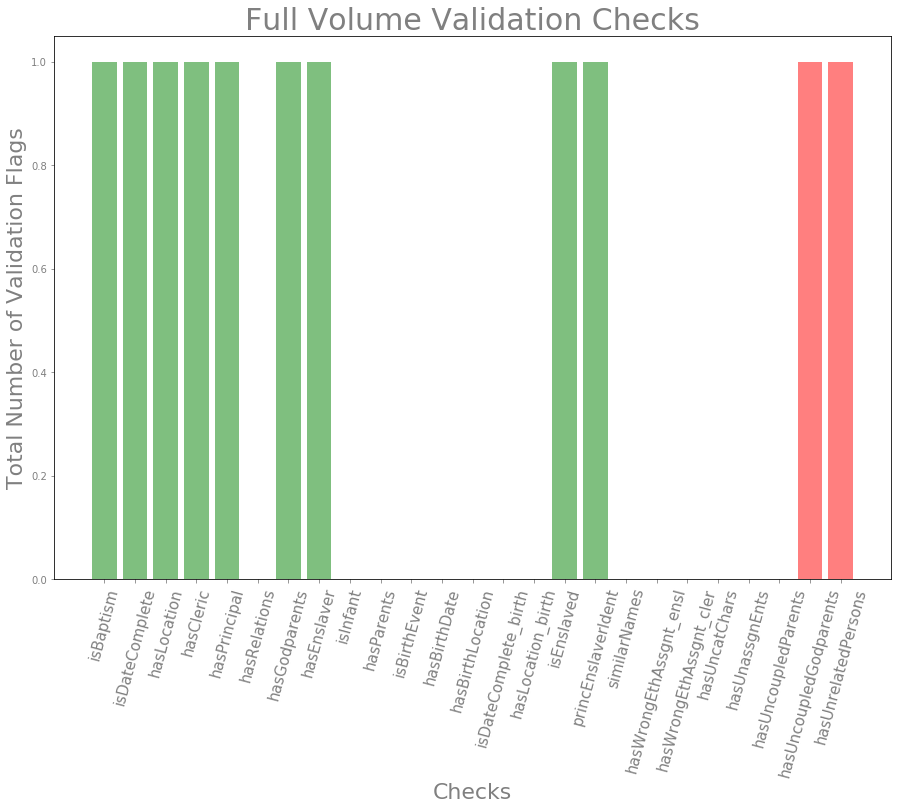

In [ ]:
#no_test

#plot the results
plt.figure(figsize=(15,10))
#Font sizes
title_font = 30
label_font = 22
tick_font = 15

objects = val1.keys()
y_pos = np.arange(len(objects))
performance = val1

plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors_array)
plt.xticks(ticks=y_pos, labels=objects, rotation=75, fontsize=tick_font)
plt.xlabel('Checks', fontsize=label_font)
plt.ylabel('Total Number of Validation Flags', fontsize=label_font)
plt.title('Full Volume Validation Checks', fontsize=title_font)

plt.show()

In [ ]:
#no_test

#flatten_volume_json("volume_records/15834.json", csv_root = "volume_records/csv/")

'volume_records/csv/'

In [ ]:
#no_test

from nbdev.export import notebook2script
notebook2script()

Converted 12-ssda-xml-parser.ipynb.
Converted 31-collate-xml-entities-spans.ipynb.
Converted 33-split-data.ipynb.
Converted 41-generic-framework-for-spacy-training.ipynb.
Converted 42-initial-model.ipynb.
Converted 51-data-preprocessing.ipynb.
Converted 52-unstructured-to-markup.ipynb.
Converted 53-markup-to-spatial-historian.ipynb.
Converted 54-utility-functions.ipynb.
Converted 61-prodigy-output-training-demo.ipynb.
Converted 62-full-model-application-demo.ipynb.
Converted 63-pt-model-training.ipynb.
Converted 64-es-model-training.ipynb.
Converted 65-all-annotations-model-training.ipynb.
Converted 66-es-guatemala-model-training.ipynb.
Converted 67-death-and-birth-records-together.ipynb.
Converted 70-exhaustive-training.ipynb.
Converted 71-relationship-builder.ipynb.
Converted 72-full-volume-processor.ipynb.
Converted 73-table-output.ipynb.
Converted 74-validation-visuals.ipynb.
